<a href="https://colab.research.google.com/github/UndavalliJagadeesh/Basic-ML/blob/EDA/EDA_Automobile_Price.ipynb" target="_parent"></a>

# **Explorative Data Analysis** (EDA)

> Explorative Data Analysis is a process where one learns about the data, forms insights and identifies important columns (features) that can be user to tell a story or later formulate a ML problem.




This data set contains  data From 1985 Ward's Automotive Yearbook which relates to the automobiles (Cars).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

> The `warnings` library has been imported to supress the warnings using the command `warnings.filterwarnings("ignore")` 

In [56]:
data=pd.read_csv('/content/Automobile_data.csv')

The data has been imported as a dataset into variable `data` using the method `.read_csv()` method of Pandas library.  

> The size of data can be known using `shape` as below.

In [57]:
data.shape

(205, 26)

It is observed that this dataset contains 205 observations with 26 features.

> The `.head()` and `.tail()` methods can be used to show a dataframe consisting of first five rows and last five rows respectively.

In [58]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [59]:
data.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [60]:
data.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

> The `.unique()` method returns list of those observations that are unique in the Data Set. 22 observations are found to be unique.

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

> Features, values and their data types present in a Data frame can  be fount with the method `.info()` . It is found that all cells are non empty.

In [62]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


`.describe()` method gives mean, min, max, median, Q1 and Q3.

In [63]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

From above, it is known that the features `normalized-losses`, `num-of-doors`, `bore`, `stroke`, `horsepower`, `peak-rpm` and `price` has null values. These null values are to be filled.

In [146]:
data.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
jaguar            3
chevrolet         3
renault           2
mercury           1
Name: make, dtype: int64

From the above, the dataset is said to be not a Balanced DataSet.

# Data visualization

> Data visualization is the act of taking information (data) and placing it into a visual context , such as a map or graph. Data visualizations make big and small data easier for the human brain to understand, and visualization also makes it easier to detect patterns, trends, and outliers in groups of data.

Data visualization is mostly carried out by using the libraries `matplotlib` and `seaborn`.

### Production of Vehicles by different industries.


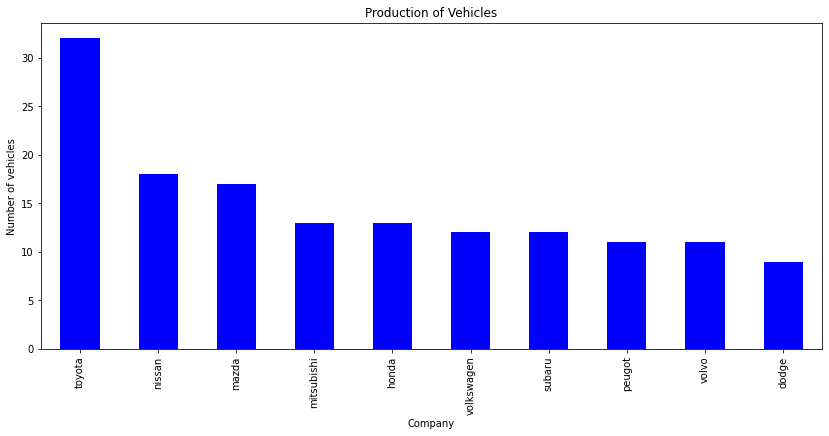

In [83]:
data.make.value_counts().nlargest(10).plot(kind='bar', figsize=(14,6), color='b')
plt.title("Production of Vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Company');

It is found that most number of automobiles are produced by `toyota`.

In [91]:
total_prod_data=data.make.value_counts().sum()
prod_data=data.make.value_counts()
percentage_toyota_data=(prod_data[0]/total_prod_data)*100
print("toyota:",percentage_toyota_data)

toyota: 15.609756097560975
205


>`toyota` produces about `15.6%` of total production of of automobiles.






### Bar graph of fuel type used

Gas: 90.2439024390244 %
Diseal:  9.756097560975604 %


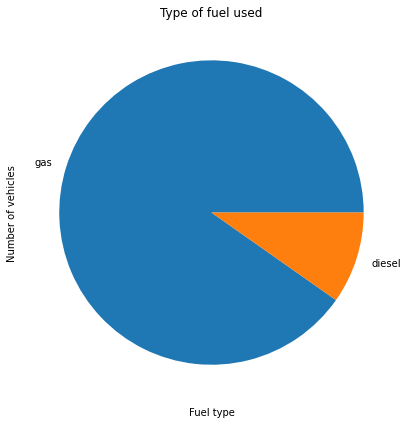

In [119]:
data['fuel-type'].value_counts().plot.pie(figsize=(7, 7))
plt.title("Type of fuel used")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

total_fuel_data=data['fuel-type'].value_counts().sum()
fuel_data=data['fuel-type'].value_counts()
percentage_gas_data=(fuel_data[0]/total_fuel_data)*100
print("Gas:",percentage_gas_data,'%')
print("Diseal: ",(100 - percentage_gas_data),'%')

From the above pie plot it is known that most of the automobiles are produced that run on `gas`.

## Scatterplots of `height`, `width`, `length` vs `price` 

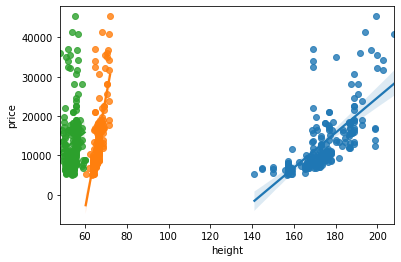

In [138]:
sns.regplot(x=data['length'], y=data['price'])
sns.regplot(x=data['width'], y=data['price'])
sns.regplot(x=data['height'], y=data['price'])

The above graph shows ***moderate positive correlation*** between `price` and `length`, `width` and `height`.

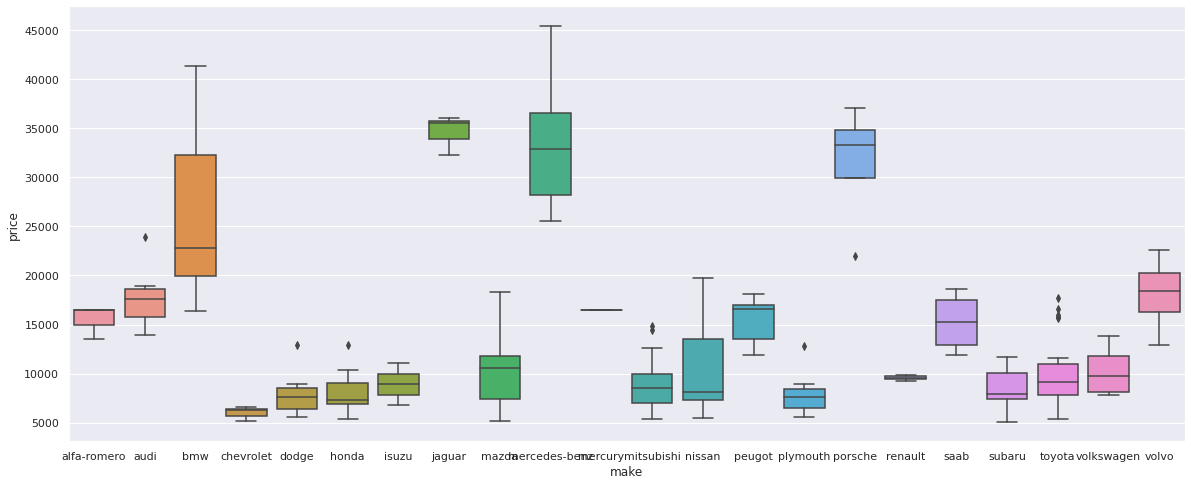

In [148]:
sns.set(rc={"figure.figsize":(20, 8)})
sns.boxplot(x="make", y="price", data=data)

The automobile from `bmw` costs more that compared to other companies which is followed by `mercury`. 

### Engine-size vs Price

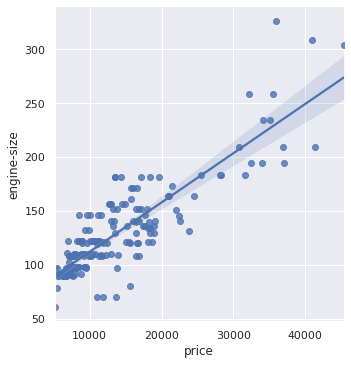

In [149]:
sns.lmplot('price',"engine-size",data);

The above graph shows ***strong positive coerelation*** between `engine-size` and `price`. Therefore `price` depends on `engine-size`.

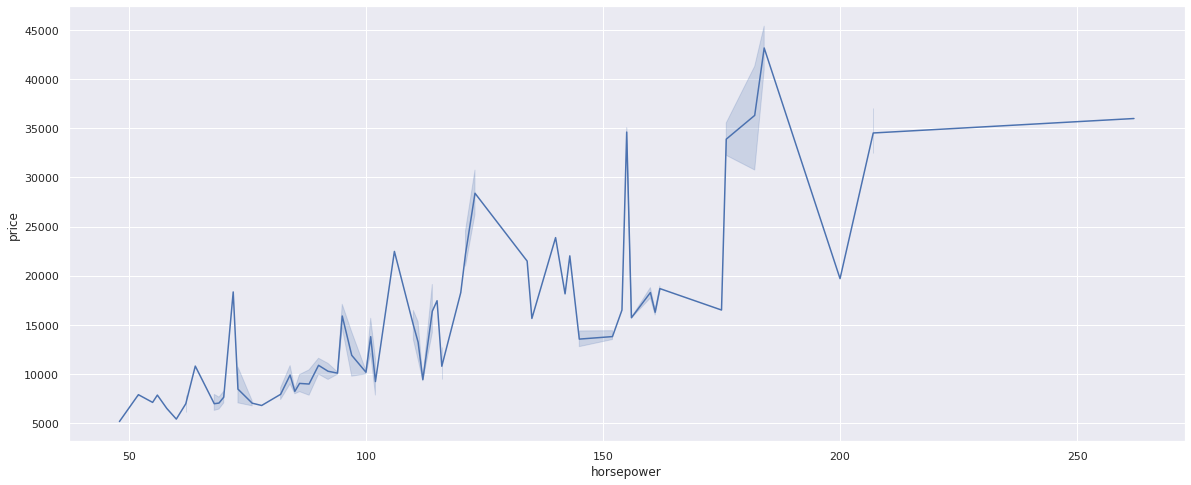

In [164]:
sns.lineplot(x ="horsepower", y ="price" ,data=data)

It is found that increase in `horsepower` has increase in `price`.

# Conclusion:


* Toyota manufactures most of the automobile vehicles than the other firms.
* Production of automobiles which runs on Gas is far more than those that runs on Diesel.
* An automobile price depends on its Dimensions, Wheel-base, Curb-weight, number-of-cylinders, bore, stroke, HP. 


